 Siddhanth Sridhar-SVM

With reference to StatQuest video-https://youtu.be/8A7L0GsBiLQ?si=deB0piPrwRKg1-g8

In [ ]:
#Importing Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df=pd.read_csv("/content/UCI_Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.rename({'default.payment.next.month':'DEFAULT'},axis="columns",inplace=True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.drop('ID',axis=1,inplace=True)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [10]:
df["SEX"].unique()

array([2, 1])

In [11]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [12]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [13]:
len(df.loc[(df['EDUCATION']==0)|(df["MARRIAGE"]==0)])

68

In [14]:
len(df)

30000

In [15]:
df_no_missing=(df.loc[(df['EDUCATION']!=0)&(df["MARRIAGE"]!=0)])

In [16]:
len(df_no_missing)

29932

In [17]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [18]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

In [19]:
df_no_default=df_no_missing[df_no_missing['DEFAULT']==0]

In [20]:
df_default=df_no_missing[df_no_missing['DEFAULT']==1]

In [21]:
df_not_default_downsampled = resample(df_no_default,
                                      replace=False,
                                      n_samples=1000,
                                      random_state=42)
len(df_not_default_downsampled)

1000

In [22]:
df_default_downsampled = resample(df_default,
                                      replace=False,
                                      n_samples=1000,
                                      random_state=42)
len(df_default_downsampled)

1000

In [23]:
df_downsample=pd.concat([df_not_default_downsampled,df_default_downsampled])

In [24]:
len(df_downsample)

2000

In [25]:
X=df_downsample.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000.0,2,3,1,28,0,0,0,0,-2,...,50000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,410.0,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0


In [26]:
y=df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [27]:
#one hot encoding for categorical data

In [28]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6',])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000.0,28,100143.0,50456.0,50000.0,0.0,0.0,0.0,2500.0,1000.0,...,0,1,0,0,0,0,0,0,0,0
4678,170000.0,29,165027.0,168990.0,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,...,0,0,0,1,0,0,0,0,0,0
16004,180000.0,29,25781.0,26000.0,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,...,0,0,0,1,0,0,0,0,0,0
22974,210000.0,32,355.0,975.0,410.0,0.0,0.0,0.0,979.0,412.0,...,0,1,0,0,0,0,0,0,0,0
17535,190000.0,45,76433.0,78472.0,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,...,0,0,0,1,0,0,0,0,0,0


#DOUBLE BAM!!!

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)

BUILDING A SVM

In [30]:
clf_svm = SVC(kernel='rbf', random_state=42)
clf_svm.fit(X_train_scale, y_train)

SVC(random_state=42)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
param_grid = [
    {'C': [0.5, 1, 10, 100], # NOTE: C > 0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf', 'linear', 'poly']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5, # n of folds cv
                             scoring="accuracy",
                             verbose=0) # if we want to see what GridSearch is doin, set verbose=2
optimal_params.fit(X_train_scale, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [32]:
clf_svm = SVC(random_state=42, gamma=0.001, C=100, kernel='rbf')
clf_svm.fit(X_train_scale, y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [ ]:
plot_confusion_matrix(clf_svm,
                     X_test_scale,
                     y_test,
                     values_format='d',
                     display_labels=['Did not default', 'Defaulted'])

In [33]:
len(df_downsample.columns)

24

Scree Plot-To test how good our SVM is using PCA

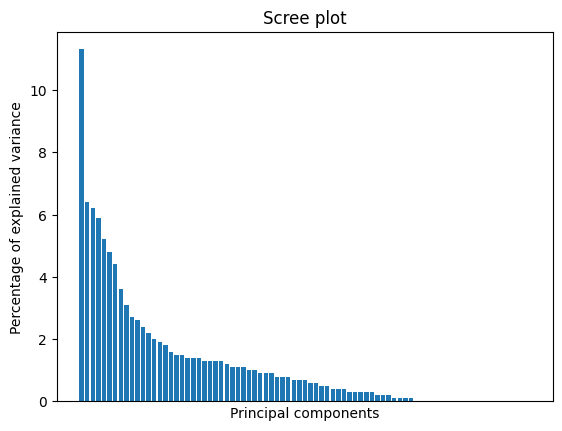

In [34]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scale)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal components')
plt.title('Scree plot')
plt.show()
